In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model  import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score,accuracy_score,confusion_matrix

##### import library in which LabelEncoder which present in sklearn.preprocessing is used to encode catogerical values in numerical values because we can work only numerical values

##### read dataset using read_csv which is present in pandas library. After this caheck shape of dataset and find information like dtypes of columns 

In [119]:
dataset1=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [120]:
dataset1.shape

(7043, 21)

In [121]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
dataset1.TotalCharges = pd.to_numeric(dataset1.TotalCharges,errors = 'coerce')

##### Convert dtype of TotalCharges Column from object to numric

In [123]:
dataset1.fillna(dataset1.TotalCharges.mean(),inplace=True)

##### fill null values in TotalCharge columns useing mean

In [124]:
dataset1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
dataset1.duplicated().any()

False

In [126]:
dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
dataset1.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


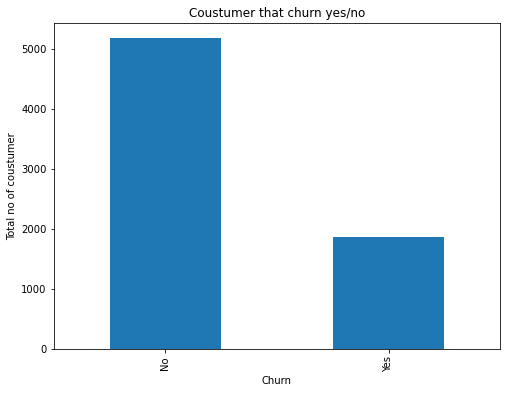

In [131]:
dataset1.Churn.value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Churn')
plt.ylabel('Total no of coustumer')
plt.title('Coustumer that churn yes/no')
plt.show()

#####  this graph show how much costumer churn or not churn the compnay 

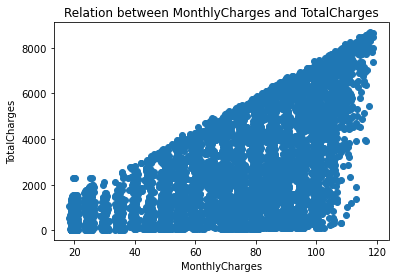

In [134]:
plt.scatter(dataset1.MonthlyCharges,dataset1.TotalCharges)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.title('Relation between MonthlyCharges and TotalCharges')
plt.show()

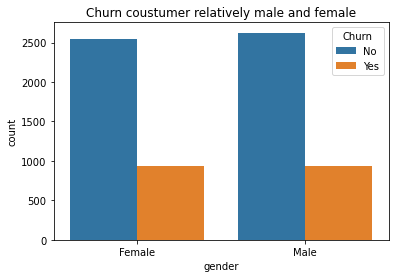

In [138]:
sns.countplot(data=dataset1, x=dataset1.gender,hue='Churn')
plt.title('Churn coustumer relatively male and female')
plt.show()

##### this graph show how much female churn and how much male churn and not churn company

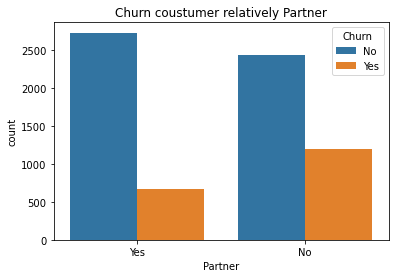

In [139]:
sns.countplot(data=dataset1, x=dataset1.Partner,hue='Churn')
plt.title('Churn coustumer relatively Partner')
plt.show()

##### this graph show how churn related on the partne column

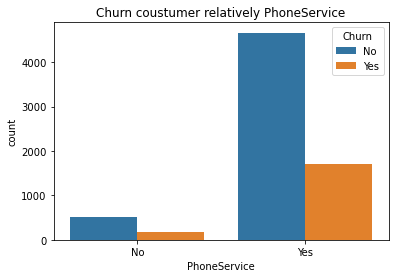

In [140]:
sns.countplot(data=dataset1, x=dataset1.PhoneService,hue='Churn')
plt.title('Churn coustumer relatively PhoneService')
plt.show()

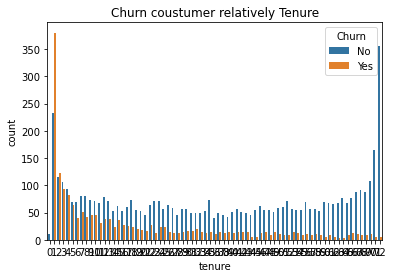

In [141]:
sns.countplot(data=dataset1, x=dataset1.tenure,hue='Churn')
plt.title('Churn coustumer relatively Tenure')
plt.show()

#####  Above graphs show how 'Churn' depent on various features. 

In [11]:
new_dataset=['Partner','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

#####  create a list which contain column names that we want to encode

In [12]:
le=LabelEncoder()

##### create instance of LabelEncoder 'le'. le is used to encode catogerical data into  numerical data

In [129]:
dataset[new_dataset] = dataset1[new_dataset].apply(le.fit_transform)

##### Encode catogerical data into numerical data using label encoding and put them into dataset

In [132]:
dataset

,customerID,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [15]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Check datset is there still null value present

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [17]:
clm=['gender','Dependents']
dataset.drop(dataset[clm],inplace=True,axis=1)

##### Drop unusefull data from dataset for more readability

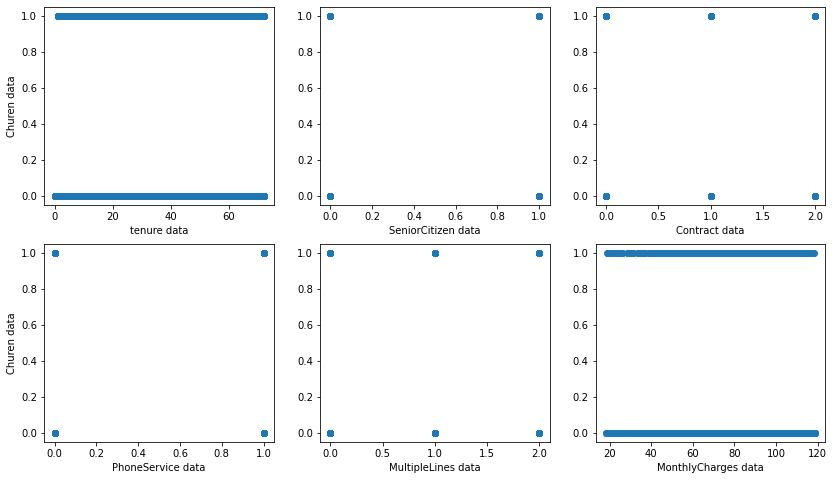

In [112]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.scatter(dataset.tenure,dataset.Churn)
plt.xlabel('tenure data')
plt.ylabel('Churen data')
plt.subplot(2,3,2)
plt.scatter(dataset.SeniorCitizen,dataset.Churn)
plt.xlabel('SeniorCitizen data')
plt.subplot(2,3,3)
plt.scatter(dataset.Contract,dataset.Churn)
plt.xlabel('Contract data')
plt.subplot(2,3,4)
plt.scatter(dataset.PhoneService,dataset.Churn)
plt.xlabel('PhoneService data')
plt.ylabel('Churen data')
plt.subplot(2,3,5)
plt.scatter(dataset.MultipleLines,dataset.Churn)
plt.xlabel('MultipleLines data')
plt.subplot(2,3,6)
plt.scatter(dataset.MonthlyCharges,dataset.Churn)
plt.xlabel('MonthlyCharges data')
plt.show()

## Logistic Regression for check coustumer churn or not

<AxesSubplot:>

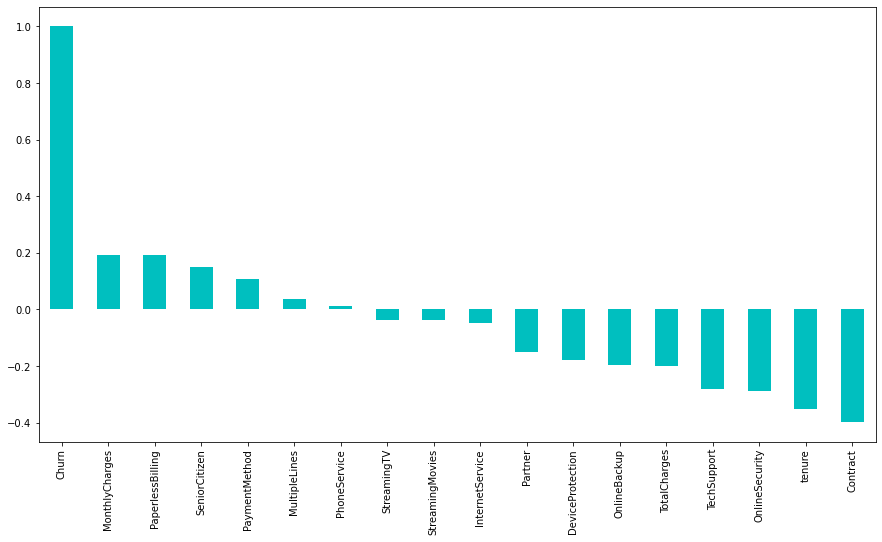

In [204]:
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color='c')

#### this graph is made to the corelation in dataset. this show how "Churn" corelate with other columns in dataset

Text(159.0, 0.5, 'Actual')

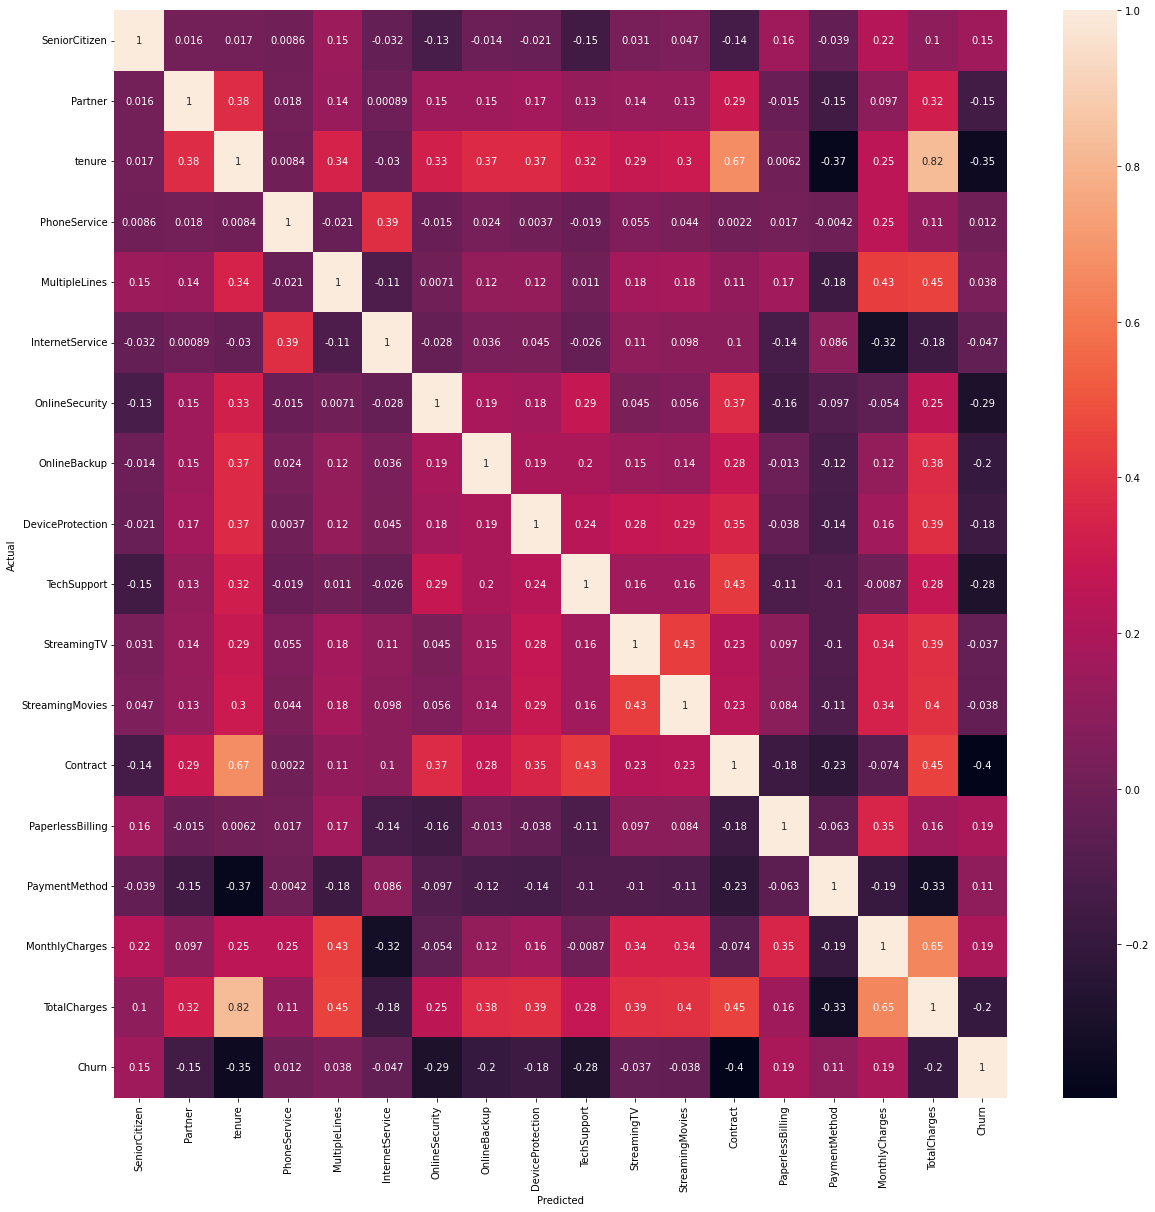

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Create Heatmap using seaborn library. Heatmap show the corelation between varialbles with the help of this we can find dependent and independent variable

In [232]:
X1=dataset[['tenure','SeniorCitizen','Contract','PhoneService','MultipleLines','MonthlyCharges']]
y1=dataset['Churn']

##### Devide data into x1 and y1 where x1 is independent variable sand y1 is dependent varibles

In [233]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size= 0.25, random_state=10)

##### Devide  dataset in train and test. by train data we train oue model and with help of test data we test accuracy of our model. during deviding data we can fix size of training and testing data using test_size attribute. in this model we take 80% data as training data and 20% data as testing data

In [234]:
lr= LogisticRegression() 
lr.fit(X1_train, y1_train)

LogisticRegression()

##### Create LogisticRegression instance 'lr' and fit model using lr.fit

In [235]:
print(lr.intercept_)

[-1.19750919]


In [236]:
print(lr.coef_)

[[-0.0400656   0.3716737  -0.96825542 -0.72013302  0.12308217  0.03075366]]


#####  intercept and coeficient of regression line respectively

In [237]:
y1_pred=lr.predict(X1_test)

In [238]:
df1=pd.DataFrame({"Actual": y1_test,"Predict": y1_pred})

In [239]:
df1

,Actual,Predict
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
...,...,...
2626,0,0
6574,0,1
6444,1,0
2760,0,0


In [240]:
print(lr.score(X1_test,y1_test)*100)

80.23850085178876


####  Accuracy score show how much our model is correct this is find using score method present sklearn.matrics

## Multiple Linear Regression to check that company how much revenue earned

Text(159.0, 0.5, 'Actual')

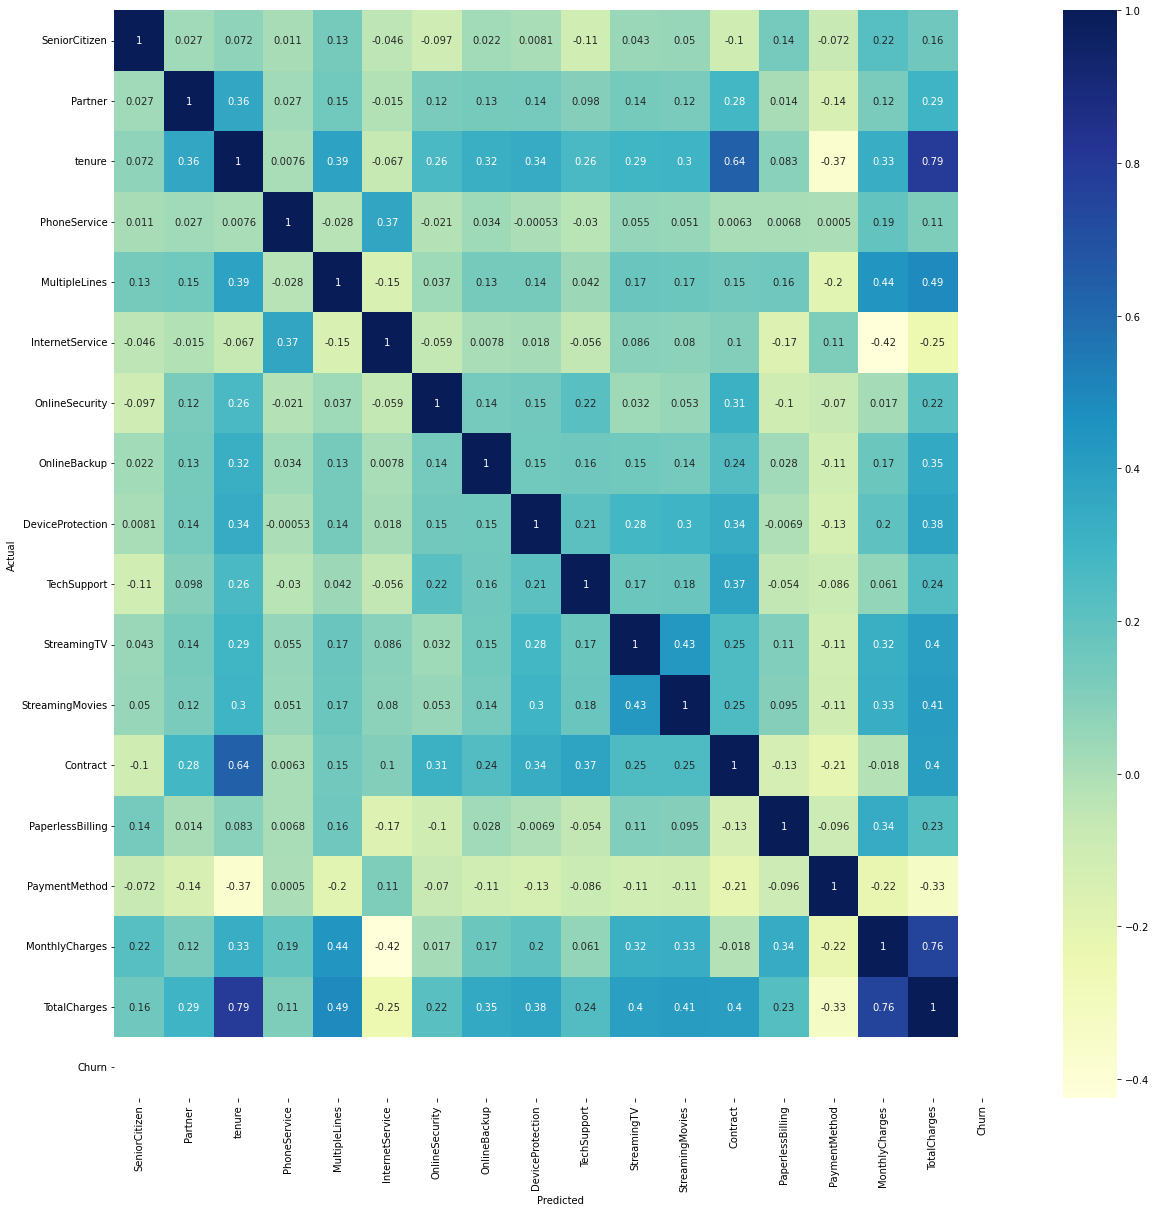

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset_no.corr(),annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')


##### Create Heatmap using seaborn library. Heatmap show the corelation between varialbles with the help of this we can find dependent and independent variable

In [175]:
X=dataset_no[['tenure','PhoneService','MonthlyCharges','InternetService','PaymentMethod','StreamingMovies','Contract','MultipleLines','DeviceProtection','OnlineBackup']]
y=dataset_no[ 'TotalCharges']

##### Devide dataset in X and y. X use as independent variable and y use as dependent varialble. X and y select from Heatmap

In [176]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=10)

##### Devide  dataset in train and test. by train data we train oue model and with help of test data we test accuracy of our model. during deviding data we can fix size of training and testing data using test_size attribute. in this model we take 70% data as training data and 30% data as testing data

In [177]:
mlr= LinearRegression() 
mlr.fit(X_train, y_train)

LinearRegression()

In [178]:
dataset_no

,customerID,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3,7795-CFOCW,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
6,1452-KIOVK,0,0,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,6840-RESVB,0,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0


##### Create instance of LinearRegression model 'mlr'. using this instance fit our model

In [179]:

print(mlr.intercept_)

-2521.7544170611754


In [180]:
print(mlr.coef_)

[ 53.54130855 -91.25724775  42.14987642  88.96914046  44.41376326
  76.73793214  49.47600723  29.54130827 124.1066376  158.57867271]


##### these are the intercpt and coeficient of regression lines respectively

In [181]:
y_pred=mlr.predict(X_test)

In [182]:
df=pd.DataFrame({"Actual": y_test,"Predict": y_pred})

In [183]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 569.6779649557678
MSE: 497558.2190810093
RMSE: 705.3780681882655


In [184]:
print(mlr.score(X,y)*100)

91.05459266369267


#### This show the accuracy of our model. we find accuracy using score method present in sklearn.matrics

In this we make a model which check coustumer will churn or not using logistic model
if coustumer will not churn then divide the dataset into two data set - churn yes/no
if churn is no then company hom much revenue can earn using multiple linear regression